# Práctica 1: Análisis exploratorio de dataset

Para la siguiente practica se ha utilizado un dataset obtenido a partir de la base de datos del telescopio TESS 
que está conformada por *Exoplanetas* descubiertos a partir de dicho telescopio, este dataset 
no contiene todas las variables que contiene el de la página oficial, escogí aquellas variables 
que me permitieran determinar *Exoplanetas de tipo rocoso*.



**Adicionalmente se eliminaro aquello planetas que cuentan con valores NULL en las variables utilizadas, reduciendo la totalidad de planetas**



## Imagen de muestra y enlace a la base de datos original

https://exoplanetarchive.ipac.caltech.edu/index.html

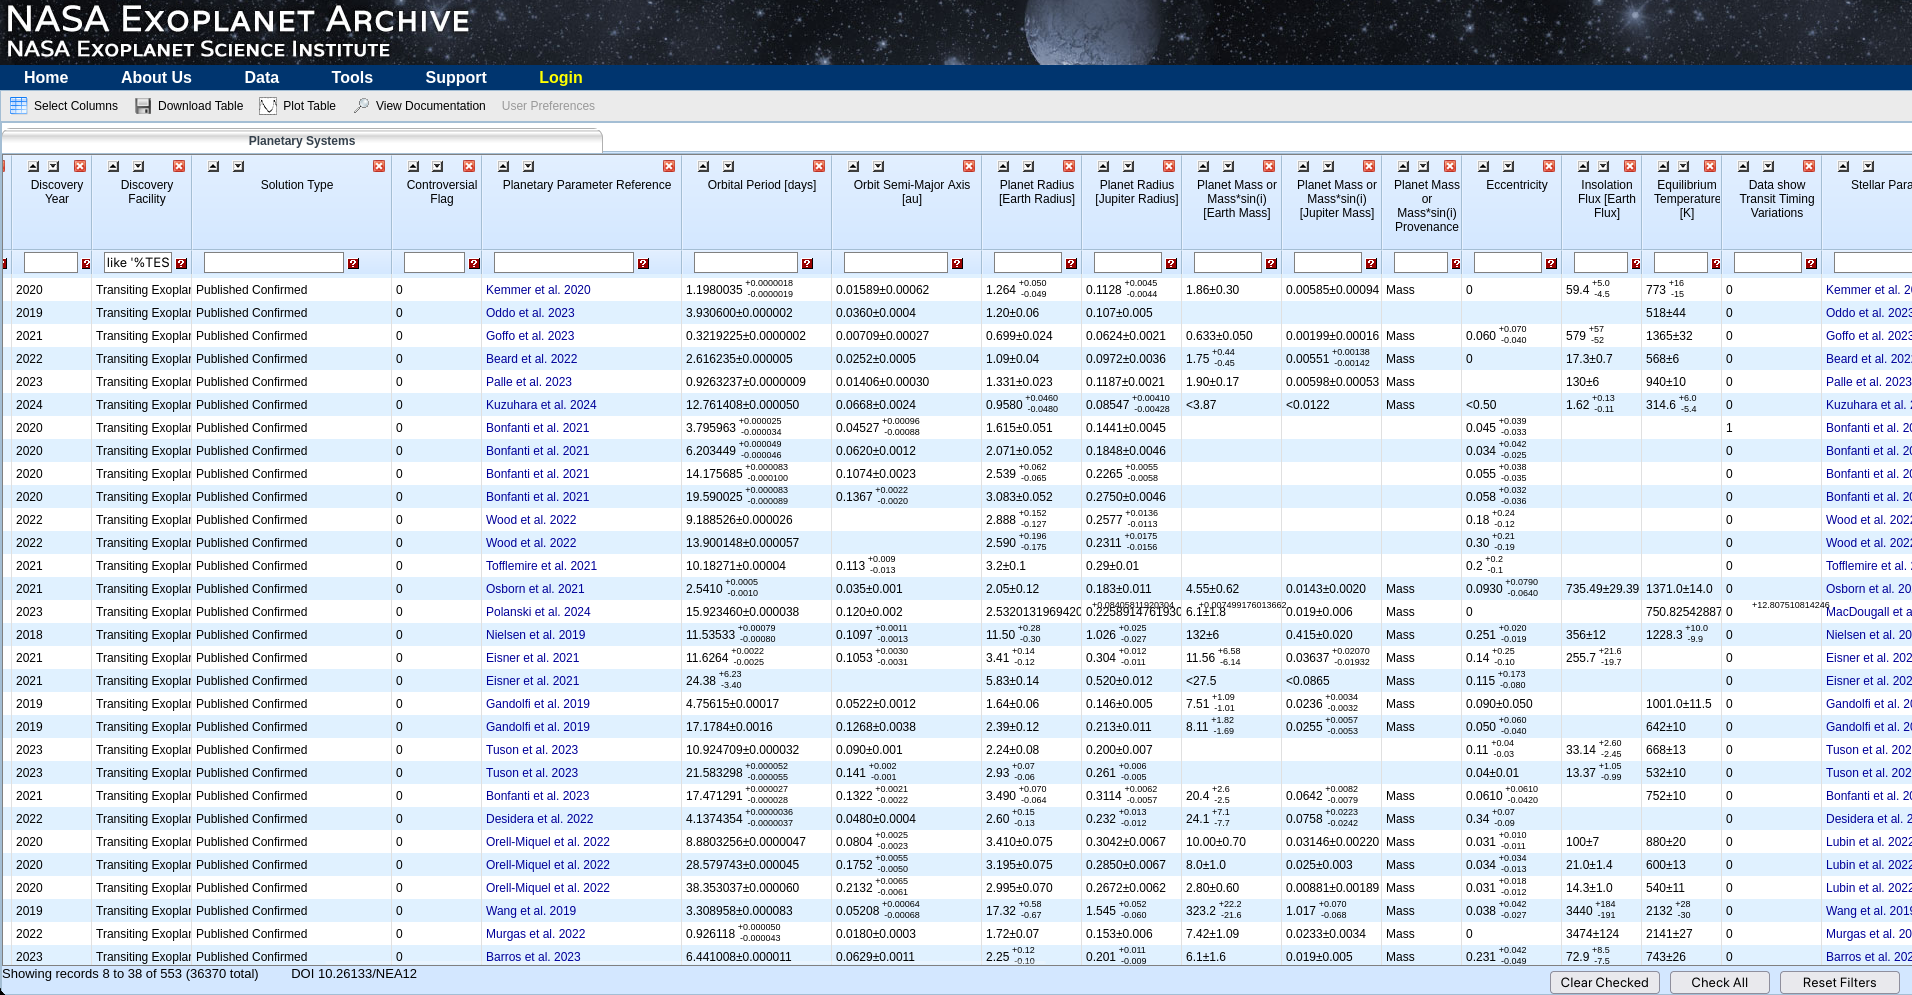

## 1. **Cargamos el archivo 'CSV' y asignamos un nombre al dataframe y enseguida se imprime**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


tessdf = pd.read_csv('TessData250523(1).csv')
tessdf

,pl_rade,pl_radj,pl_bmasse,pl_bmassj,st_teff,pl_eqt,Pl_eh_vol,Pl_J_vol,dens_pl_ert,dens_pl_jup
0,2.610,0.233,22.70000,0.07142,4640.0,422,17.779581,0.012649,1.276749,5279.852677
1,2.130,0.190,3.34000,0.01051,3556.0,693,9.663597,0.006859,0.345628,1432.885986
2,1.264,0.113,1.86000,0.00585,3347.0,773,2.019488,0.001443,0.921028,3791.318391
3,1.217,0.109,1.84000,0.00579,3505.0,525,1.802485,0.001295,1.020816,4180.890486
4,0.718,0.064,0.54600,0.00172,3522.0,1745,0.370146,0.000262,1.475097,6135.617067
...,...,...,...,...,...,...,...,...,...,...
207,11.994,1.070,301.93850,0.95000,6261.0,1397,1725.409296,1.225043,0.174996,725.173615
208,13.126,1.171,211.99261,0.66700,5570.0,1192,2261.503164,1.605723,0.093740,388.440828
209,9.550,0.852,55.30242,0.17400,5710.0,1526,870.983875,0.618470,0.063494,263.087483
210,2.765,0.247,9.10000,0.02863,4435.0,941,21.139047,0.015069,0.430484,1776.643168


# Descripción de Dataset

### El dataset está compuesto por 212 Exoplanetas (filas) y para cada uno se tienen 10 variables (columnas).

- **pl_rade** (Radio del Explaneta respecto a la Tierra)
- **pl_radj** (Radio del Explaneta respecto a Jupiter)
- **pl_bmasse** (Masa del Explaneta respecto a la Tierra)
- **pl_bmassj** (Masa del Explaneta respecto a Jupiter)
- **st_teff** (Temperatura efectiva estelar)
- **pl_eqt** (Temperatura en equilibrio del planeta)
- **Pl_eh_vol** (Volumen dle planeta respecto a la Tierra)
- **Pl_J_vol** (Volumen dle planeta respecto a Jupiter)
- **dens_pl_ert** (Densidad del planeta respecto a la Tierra)
- **dens_pl_jup** (Densidad del planeta respecto a Jupiter)

## Temperatura de las estrellas

array([[<Axes: title={'center': 'st_teff'}>]], dtype=object)

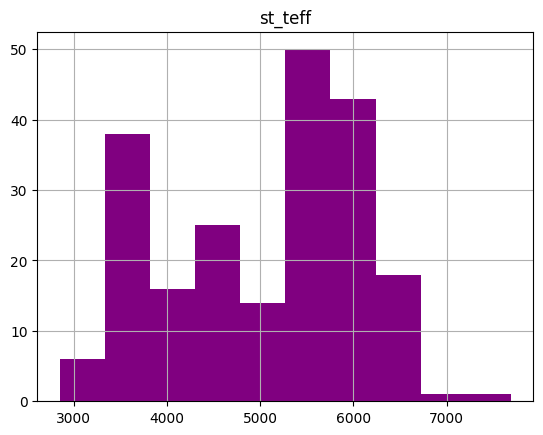

In [2]:
tessdf.hist('st_teff', color = 'purple') 

**Como primer acercamiento se muestra el histograma que muestra la distribución de las estrellas de cada planeta según su temperatura, esto es interesante ya que conociendo el diagrama HR (*Hertzsprung-Russell*) podemos notar que la mayoria de los plaentas tienen una estrella parecida al Sol**


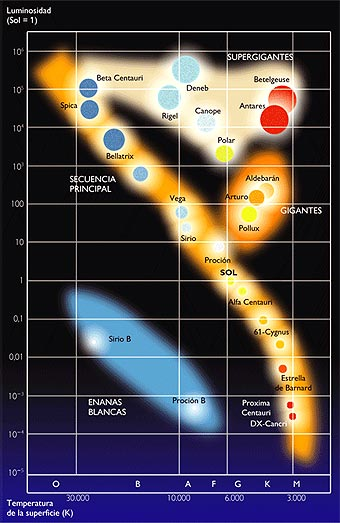

## Temperatura de los Exoplanetas

array([[<Axes: title={'center': 'pl_eqt'}>]], dtype=object)

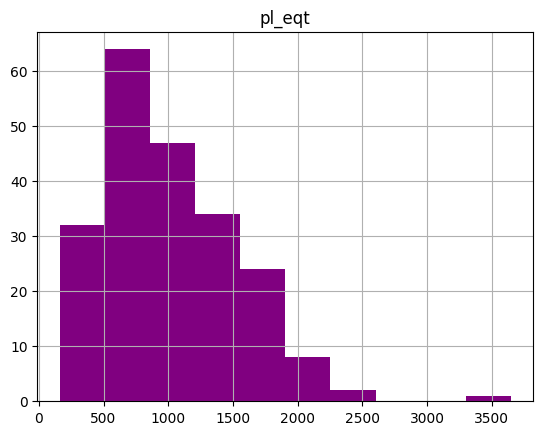

In [9]:
tessdf.hist('pl_eqt', color = 'purple') 

Con el histograma anterior de una forma muy sencilla se nos muestra algo muy importante, tenemos más exoplanetas con temperaturas entre 500K y 1000K por ello podemos comparar con las de nuestro sistema solar y ver cuan variantes estas pueden ser

**Mercurio:**

  -  Temperatura media: ~440 K

**Venus:**

 - Temperatura media: ~737 K
 
**Tierra:**

 - Temperatura media: ~288 K 

**Marte:**

 - Temperatura media: ~210 K
    
**Júpiter:**

 - Temperatura media (en las nubes): ~125 K

**Saturno:**

 - Temperatura media (en las nubes): ~95 K

**Urano:**

 - Temperatura media: ~73 K

**Neptuno:**

 - Temperatura media: ~72 K

## Descripción general de las densidades planetarias

In [3]:
tessdf.fillna(0)
tessdf['dens_pl_ert'].describe()

count    212.000000
mean       0.819621
std        1.915110
min        0.026280
25%        0.144893
50%        0.376838
75%        0.856498
max       21.224218
Name: dens_pl_ert, dtype: float64

**En la celda anterior se realizan la estadistica y descripción 
básica para la variable 'dens_pl_ert',
esto con la finalidad de validar que tan parecidos 
son los Exoplanetas en comparación a la tierra en su densidad.**

**Gracias a esto podríamos hacer una primera deducción que nos indica que la 
mayoria de los Exoplanetas tienen una densidada menor a la de la Tierra la mayoria debajo de 0.8**


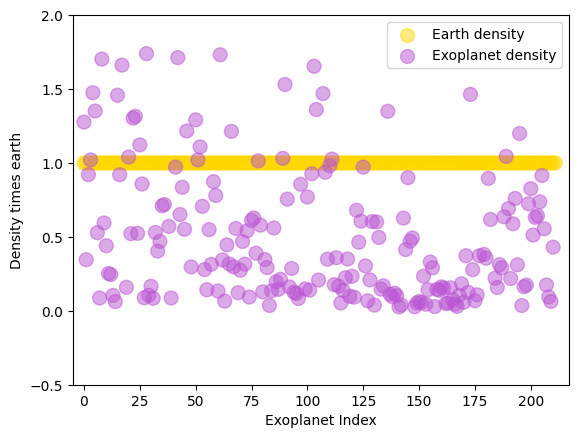

In [4]:
densidades_exoplanetas = tessdf['dens_pl_ert']  
densidad_tierra = 1  
densidad_tierra_comparativa = [densidad_tierra] * len(densidades_exoplanetas)

sizes = [100] * len(densidades_exoplanetas)  
colors = ['blue'] * len(densidades_exoplanetas) 
plt.scatter(range(len(densidades_exoplanetas)), densidad_tierra_comparativa, s=sizes, c='gold', alpha=0.5, label='Earth density')
plt.scatter(range(len(densidades_exoplanetas)), densidades_exoplanetas, s=sizes, c='mediumorchid', alpha=0.5, label='Exoplanet density')


plt.xlabel('Exoplanet Index')
plt.ylabel('Density times earth')


plt.xlim(-5, len(densidades_exoplanetas) + 5)  
plt.ylim(-0.5, 2) 
# Leyenda
plt.legend()

plt.show()

**Se añade un valor artificial *1* a los datos ese valor representa la densidad de la tierra, la finalidad de esto es el validar que los datos están bastante dispersos alrededor de la media, además nos deja ver que muy pocos se tienen una densidad parecida a la de la Tierra**

## Densidad respecto a la Tierra VS temperatura estelar

<Axes: xlabel='st_teff', ylabel='dens_pl_ert'>

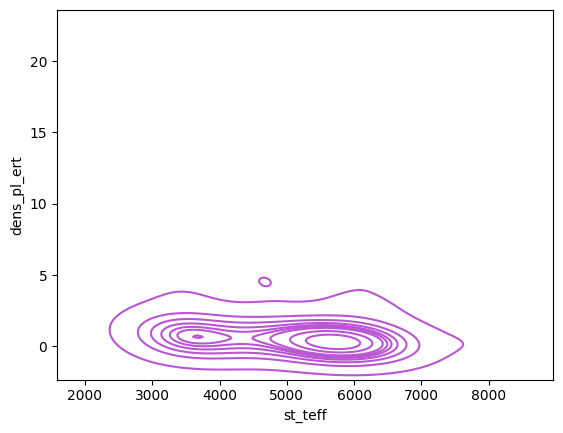

In [17]:
sns.kdeplot(x='st_teff', y='dens_pl_ert',color = 'mediumorchid', data=tessdf)



**En este caso podemos observar que hay una mayor densidad de planetas similares a la Tierra y que además tienen una estrella con una temperatura parecida al Sol (5772K)**

# Temperatura de la estrella VS temperatura del planeta

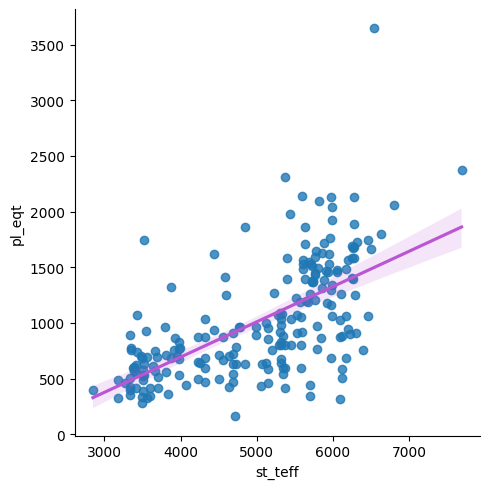

In [29]:
sns.lmplot(x='st_teff', y = 'pl_eqt', data = tessdf, line_kws={'color': 'mediumorchid'})

**Con esta última gráfica podemos visualizar como aquellos planetas que tienen una estrella con temperaturas cercanas al Sol no tienen necesariamente una temperatura como la de nuestro planeta Tierra,**

## Comparación radio de planeta y masa del planeta

<Axes: xlabel='pl_rade', ylabel='pl_bmasse'>

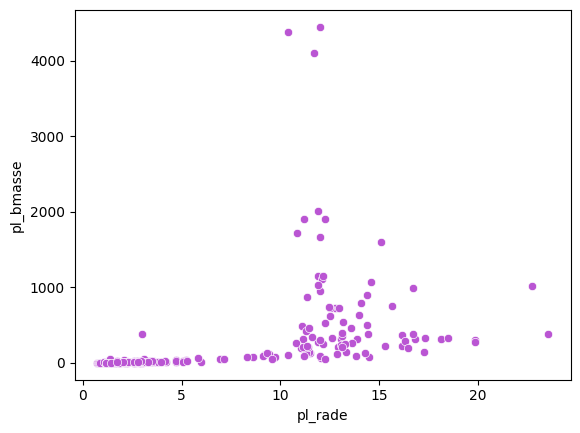

In [20]:
sns.scatterplot(x='pl_rade', y='pl_bmasse',color = 'mediumorchid', data=tessdf)

**Esta grafica resulta bastante interesante ya que nos permite ver como los planetas más grandes tienen a ser más masivos**

# Usando pairplot

**Un panorama general de como el tamaño de los *exoplanetas*(pl_rade) se comportan respecto a otras variables de interes**

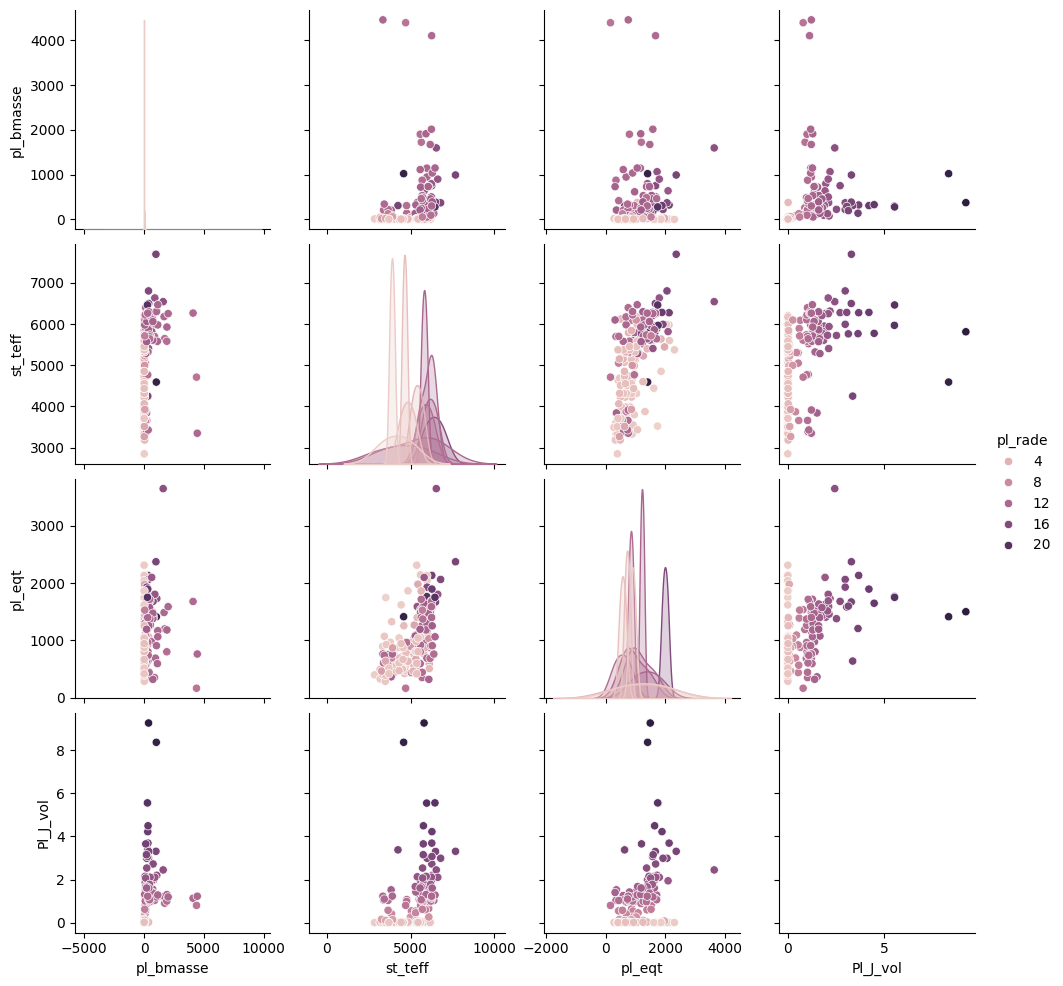

In [36]:
columnas_interes = [ 'pl_bmasse', 'st_teff', 'pl_eqt','Pl_J_vol']

sns.pairplot(tessdf, hue='pl_rade', vars=columnas_interes)

# Conclusiones

**El uso de herramientas como funciones que muestran las generalidades de los datos con los que se trabajan nos permite, en un primer acercamiento, validar si nuestros datos son útiles para un analisis más profundo, este caso por ejemplo si yo quisiera buscar planetas parecidos a los de la Tierra no sería muy alentador ya que la mayoria de los *exoplanetas* dentro dle Dataset difieren bastante de las caracteristicas que podemos encontrar en la Tierra para estas mismas variables**